Ratings Predictor

In [1]:
#Importing necessary libraries and modules
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from google_play_scraper import app
import nltk, re, math, collections, unicodedata, nltk.classify.util, nltk.metrics
from nltk.classify import NaiveBayesClassifier

In [42]:
!pip install google_play_scraper

In [2]:
#Importing reviews from the ShareChat review page on Google Playstore
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'in.mohalla.sharechat',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count=50000, # No. of reviews taken into account
    filter_score_with=None # defaults to None(means all score)
)
df_rev = pd.DataFrame(np.array(result),columns=['review'])#Arranging all the data in a Data Frame
df_rev = df_rev.join(pd.DataFrame(df_rev.pop('review').tolist()))#Arranging all the data of the Data Frame in appropriate format
df_rev #Displaying the imported data
df_rev.to_csv('C://Users//user//Desktop//Course Content//Trimester 5//Assignment//TA//ShareChat Review.csv')

In [22]:
# Filter reviews with more than 20 words and saving it in a .CSV format
df = df_rev[df_rev['content'].apply(lambda x: len(str(x).split()) > 20)]
df.to_csv('C://Users//user//Desktop//Course Content//Trimester 5//Assignment//TA//ShareChat Review_Filter.csv')

NameError: name 'df_rev' is not defined

In [2]:
# Load your dataset
# Assuming you have a CSV file with 'review' and 'rating' columns
# Replace 'your_dataset.csv' with the actual filename
r1 = open("C://Users//user//Desktop//Course Content//Trimester 5//Assignment//TA//Rating1.txt", errors="ignore")
r2 = open("C://Users//user//Desktop//Course Content//Trimester 5//Assignment//TA//Rating2.txt", errors="ignore")
r3 = open("C://Users//user//Desktop//Course Content//Trimester 5//Assignment//TA//Rating3.txt", errors="ignore")
r4 = open("C://Users//user//Desktop//Course Content//Trimester 5//Assignment//TA//Rating4.txt", errors="ignore")
r5 = open("C://Users//user//Desktop//Course Content//Trimester 5//Assignment//TA//Rating5.txt", errors="ignore")

In [3]:
r1

<_io.TextIOWrapper name='C://Users//user//Desktop//Course Content//Trimester 5//Assignment//TA//Rating1.txt' mode='r' encoding='cp1252'>

In [4]:
# Reading the contents of five files into variables
r1_read = r1.read()
r2_read = r2.read()
r3_read = r3.read()
r4_read = r4.read()
r5_read = r5.read()

import re
# Regular expression pattern to match URLs (with or without http/https and www)
pattern = r'(https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+) | (www(?:[-\w.]|(?:%[\da-fA-F]{2}))+)'
# Applying regular expression substitution to clean URLs from each file's content
r1_clean = re.sub(pattern,' ', r1_read)
r2_clean = re.sub(pattern,' ', r2_read)
r3_clean = re.sub(pattern,' ', r3_read)
r4_clean = re.sub(pattern,' ', r4_read)
r5_clean = re.sub(pattern,' ', r5_read)



#r1_string = unicodedata.normalize('NFKD', r1_clean).encode('ascii','ignore')
#r2_string = unicodedata.normalize('NFKD', r2_clean).encode('ascii','ignore')
#r3_string = unicodedata.normalize('NFKD', r3_clean).encode('ascii','ignore')
#r4_string = unicodedata.normalize('NFKD', r4_clean).encode('ascii','ignore')
#r5_string = unicodedata.normalize('NFKD', r5_clean).encode('ascii','ignore')

In [5]:
r5_clean #Used to check the content

'I\'ve every support for the App not only becoz it\'s indigenous but it works well. Yes, My earlier problems are No more n I find it much much better as some new features are added. Photo editing features are really wonderful in comparison with other famous n more popular Apps. Only Absence of Screenshot often creates some problem.\nIndia"s most popular App. It has got A 2 Z sections. Very useful for Kids and different age groups. We like it and love it. Congrats keep going.\nI can easyly understand the situation for from this app. Its helps to update and Also helps to communicate with my update and also helps to grow and improve my self and it\'s very informative .Also helps situation. And it\'s very entertaining me .for example nature pictures are too good to see. And etc.......\nThis app is nice Ã°Å¸â€˜Å’ but one iessu so many adds coming , some time videos not coming sounds please clear the issues ... Over all i like sharechat Ã°Å¸Â¤â€”Ã¢ÂÂ¤Ã¯Â¸Â\nI liked this very much and also ve

Based on Content Words

In [6]:
# Function to extract word features from a given text, excluding stop words
from nltk.corpus import stopwords
def word_feats(words):
    return dict([(word, True) for word in words.split() if word not in stopset])

# Creating a list of English stop words using NLTK
stopset = list(set(stopwords.words('english')))


# Tokenizing and extracting words from cleaned text of each file
r1Words = re.findall(r"[\w']+|[.,!?;]", str(r1_clean))
r2Words = re.findall(r"[\w']+|[.,!?;]", str(r2_clean))
r3Words = re.findall(r"[\w']+|[.,!?;]", str(r3_clean))
r4Words = re.findall(r"[\w']+|[.,!?;]", str(r4_clean))
r5Words = re.findall(r"[\w']+|[.,!?;]", str(r5_clean))

In [7]:
# Opening and reading the file containing function words
func_words = open("C://Users//user//Desktop//Course Content//Trimester 5//Text Analytics//Text//functionWordlist.txt", 'r')
func_words_read = func_words.read()
#func_word_uni= func_words_read.decode('utf-8')
# Normalizing and encoding the function words to handle potential encoding issues
func_words_string = unicodedata.normalize('NFKD', func_words_read).encode('ascii','ignore')
func_words_string[0:20]

# Converting the function words to lowercase and tokenizing them
funcstring = func_words_string.lower()
funcWords = re.findall(r"[\w']+|[.,!?;]", str(funcstring))
funcWords[0:20]

# Filtering out function words from each file's content
r1content = [x for x in r1Words if x not in funcWords]
len(r1content)

r2content = [x for x in r2Words if x not in funcWords]
len(r2content)

r3content = [x for x in r3Words if x not in funcWords]
len(r3content)

r4content = [x for x in r4Words if x not in funcWords]
len(r4content)

r5content = [x for x in r5Words if x not in funcWords]
len(r5content)

# Creating feature sets for each file excluding function words
r1_feats = [(word_feats(f), 'Rating 1') for f in r1content ]
r2_feats = [(word_feats(f), 'Rating 2') for f in r2content ]
r3_feats = [(word_feats(f), 'Rating 3') for f in r3content ]
r4_feats = [(word_feats(f), 'Rating 4') for f in r4content ]
r5_feats = [(word_feats(f), 'Rating 5') for f in r5content ]

# Determining cutoffs for training and testing data
r1cutoff = int(len(r1_feats)*3/4)
r2cutoff = int(len(r2_feats)*3/4)
r3cutoff = int(len(r3_feats)*3/4)
r4cutoff = int(len(r4_feats)*3/4)
r5cutoff = int(len(r5_feats)*3/4)


# Combining feature sets for training and testing data
trainfeats = r1_feats[:r1cutoff] + r2_feats[:r2cutoff]+ r3_feats[:r3cutoff] + r4_feats[:r4cutoff]+ r5_feats[:r5cutoff]
testfeats = r1_feats[r1cutoff:] + r2_feats[r2cutoff:]+ r3_feats[r3cutoff:]+ r4_feats[r4cutoff:]+ r5_feats[r5cutoff:] 

In [8]:
trainfeats #Checking for contents

[({'Worst': True}, 'Rating 1'),
 ({'update': True}, 'Rating 1'),
 ({'.': True}, 'Rating 1'),
 ({"You're": True}, 'Rating 1'),
 ({'going': True}, 'Rating 1'),
 ({'status': True}, 'Rating 1'),
 ({'implementation': True}, 'Rating 1'),
 ({'bad': True}, 'Rating 1'),
 ({'things': True}, 'Rating 1'),
 ({'app': True}, 'Rating 1'),
 ({'.': True}, 'Rating 1'),
 ({'1': True}, 'Rating 1'),
 ({'.': True}, 'Rating 1'),
 ({'I': True}, 'Rating 1'),
 ({'unable': True}, 'Rating 1'),
 ({'change': True}, 'Rating 1'),
 ({'name': True}, 'Rating 1'),
 ({'.': True}, 'Rating 1'),
 ({'By': True}, 'Rating 1'),
 ({'mistaken': True}, 'Rating 1'),
 ({'profile': True}, 'Rating 1'),
 ({'name': True}, 'Rating 1'),
 ({'saved': True}, 'Rating 1'),
 ({'dash': True}, 'Rating 1'),
 ({'change': True}, 'Rating 1'),
 ({'name': True}, 'Rating 1'),
 ({'multiple': True}, 'Rating 1'),
 ({'tries': True}, 'Rating 1'),
 ({'reinstall': True}, 'Rating 1'),
 ({'app': True}, 'Rating 1'),
 ({'well': True}, 'Rating 1'),
 ({'2': True}, 'Ra

In [9]:
import nltk
import random
#Using random elements from the trainfeats object
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)
Classifier = nltk.NaiveBayesClassifier.train(trainfeats)

print ('accuracy:'), nltk.classify.util.accuracy(Classifier, testfeats) #Checking for accuracy

accuracy:


(None, 0.4390213696971365)

In [10]:
Classifier.show_most_informative_features(5) #Displaying top 5 most informative features

Most Informative Features
                      ÂÅ = True           Rating : Rating =    148.9 : 1.0
                      œÂ = True           Rating : Rating =     67.4 : 1.0
                   Worst = True           Rating : Rating =     51.1 : 1.0
                   worst = True           Rating : Rating =     47.0 : 1.0
               wonderful = True           Rating : Rating =     45.8 : 1.0


Based on Function Words

In [11]:
import random
random.shuffle(trainfeats)
#Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)

Classifier = NaiveBayesClassifier.train(trainfeats)
print ('accuracy:'), nltk.classify.util.accuracy(Classifier, testfeats)

## Another way
## nltk.classify.accuracy(Classifier, testfeats)

print ('accuracy:', nltk.classify.util.accuracy(Classifier, trainfeats))#Checking for accuracy
print (Classifier.show_most_informative_features(5))#Displaying top 5 most informative features

accuracy:
accuracy: 0.4999655977505516
Most Informative Features
                      ÂÅ = True           Rating : Rating =    148.9 : 1.0
                      œÂ = True           Rating : Rating =     67.4 : 1.0
                   Worst = True           Rating : Rating =     51.1 : 1.0
                   worst = True           Rating : Rating =     47.0 : 1.0
               wonderful = True           Rating : Rating =     45.8 : 1.0
None


All Words

In [12]:
from nltk.corpus import stopwords
# Function to extract word features from a given text, excluding stop words
def word_feats(words):
	return dict([(word, True) for word in words.split() if word not in stopset])# Creating a dictionary of word features (excluding stop words)
# Creating a list of English stop words using NLTK
stopset = list(set(stopwords.words('english')))


# Tokenizing and extracting words from cleaned text of each file
r1Words = re.findall(r"[\w']+|[.,!?;]", str(r1_clean))
r2Words = re.findall(r"[\w']+|[.,!?;]", str(r2_clean))
r3Words = re.findall(r"[\w']+|[.,!?;]", str(r3_clean))
r4Words = re.findall(r"[\w']+|[.,!?;]", str(r4_clean))
r5Words = re.findall(r"[\w']+|[.,!?;]", str(r5_clean))

# Creating feature sets for each file excluding function words
r1_feats = [(word_feats(f), 'Rating 1') for f in r1content ]
r2_feats = [(word_feats(f), 'Rating 2') for f in r2content ]
r3_feats = [(word_feats(f), 'Rating 3') for f in r3content ]
r4_feats = [(word_feats(f), 'Rating 4') for f in r4content ]
r5_feats = [(word_feats(f), 'Rating 5') for f in r5content ]


# Determining cutoffs for training and testing data
r1cutoff = int(len(r1_feats)*3/4)
r2cutoff = int(len(r2_feats)*3/4)
r3cutoff = int(len(r3_feats)*3/4)
r4cutoff = int(len(r4_feats)*3/4)
r5cutoff = int(len(r5_feats)*3/4)


# Combining feature sets for training and testing data
trainfeats = r1_feats[:r1cutoff] + r2_feats[:r2cutoff]+ r3_feats[:r3cutoff] + r4_feats[:r4cutoff]+ r5_feats[:r5cutoff]
testfeats = r1_feats[r1cutoff:] + r2_feats[r2cutoff:]+ r3_feats[r3cutoff:]+ r4_feats[r4cutoff:]+ r5_feats[r5cutoff:] 

import random
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)

Classifier = NaiveBayesClassifier.train(trainfeats)


print ('accuracy:', nltk.classify.util.accuracy(Classifier, testfeats))#Checking for accuracy

print (Classifier.show_most_informative_features(10))#Displaying top 5 most informative features

accuracy: 0.4390213696971365
Most Informative Features
                      ÂÅ = True           Rating : Rating =    148.9 : 1.0
                      œÂ = True           Rating : Rating =     67.4 : 1.0
                   Worst = True           Rating : Rating =     51.1 : 1.0
                   worst = True           Rating : Rating =     47.0 : 1.0
               wonderful = True           Rating : Rating =     45.8 : 1.0
                   ËœËœÃ = True           Rating : Rating =     39.1 : 1.0
                   Shake = True           Rating : Rating =     36.3 : 1.0
               beautiful = True           Rating : Rating =     31.5 : 1.0
                customer = True           Rating : Rating =     30.1 : 1.0
                      œâ = True           Rating : Rating =     29.9 : 1.0
None


In [13]:
r1cutoff

71622

#Content + Function words

In [14]:
from nltk.corpus import stopwords
def word_feats(words):
    return dict([(word, True) for word in words.split() if word not in stopset])

stopset = list(set(stopwords.words('english')))



r1Words = re.findall(r"[\w']+|[.,!?;]", str(r1_clean))
r2Words = re.findall(r"[\w']+|[.,!?;]", str(r2_clean))
r3Words = re.findall(r"[\w']+|[.,!?;]", str(r3_clean))
r4Words = re.findall(r"[\w']+|[.,!?;]", str(r4_clean))
r5Words = re.findall(r"[\w']+|[.,!?;]", str(r5_clean))

func_words = open("C://Users//user//Desktop//Course Content//Trimester 5//Text Analytics//Text//functionWordlist.txt", 'r')
func_words_read = func_words.read()
#func_word_uni= func_words_read.decode('utf-8')
func_words_string = unicodedata.normalize('NFKD', func_words_read).encode('ascii','ignore')
func_words_string[0:20]
funcstring = func_words_string.lower()
funcWords = re.findall(r"[\w']+|[.,!?;]", str(funcstring))
funcWords[0:20]


r1content = [x for x in r1Words if x not in funcWords]
len(r1content)

r2content = [x for x in r2Words if x not in funcWords]
len(r2content)

r3content = [x for x in r3Words if x not in funcWords]
len(r3content)

r4content = [x for x in r4Words if x not in funcWords]
len(r4content)

r5content = [x for x in r5Words if x not in funcWords]
len(r5content)

r1_feats = [(word_feats(f), 'Rating 1') for f in r1content ]
r2_feats = [(word_feats(f), 'Rating 2') for f in r2content ]
r3_feats = [(word_feats(f), 'Rating 3') for f in r3content ]
r4_feats = [(word_feats(f), 'Rating 4') for f in r4content ]
r5_feats = [(word_feats(f), 'Rating 5') for f in r5content ]

r1cutoff = int(len(r1_feats)*3/4)
r2cutoff = int(len(r2_feats)*3/4)
r3cutoff = int(len(r3_feats)*3/4)
r4cutoff = int(len(r4_feats)*3/4)
r5cutoff = int(len(r5_feats)*3/4)



trainfeats = r1_feats[:r1cutoff] + r2_feats[:r2cutoff]+ r3_feats[:r3cutoff] + r4_feats[:r4cutoff]+ r5_feats[:r5cutoff]
testfeats = r1_feats[r1cutoff:] + r2_feats[r2cutoff:]+ r3_feats[r3cutoff:]+ r4_feats[r4cutoff:]+ r5_feats[r5cutoff:]

import random
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)


Classifier = NaiveBayesClassifier.train(trainfeats)
print ('accuracy:'), nltk.classify.util.accuracy(Classifier, testfeats)

accuracy:


(None, 0.4390213696971365)

In [15]:
print (Classifier.show_most_informative_features(10))

Most Informative Features
                      ÂÅ = True           Rating : Rating =    148.9 : 1.0
                      œÂ = True           Rating : Rating =     67.4 : 1.0
                   Worst = True           Rating : Rating =     51.1 : 1.0
                   worst = True           Rating : Rating =     47.0 : 1.0
               wonderful = True           Rating : Rating =     45.8 : 1.0
                   ËœËœÃ = True           Rating : Rating =     39.1 : 1.0
                   Shake = True           Rating : Rating =     36.3 : 1.0
               beautiful = True           Rating : Rating =     31.5 : 1.0
                customer = True           Rating : Rating =     30.1 : 1.0
                      œâ = True           Rating : Rating =     29.9 : 1.0
None


POS Tags

In [17]:

# Tokenizing the cleaned text of each file
r1tokens = nltk.word_tokenize(str(r1_clean))
r2tokens = nltk.word_tokenize(str(r2_clean))
r3tokens = nltk.word_tokenize(str(r3_clean))
r4tokens = nltk.word_tokenize(str(r4_clean))
r5tokens = nltk.word_tokenize(str(r5_clean))

# Generating part-of-speech tags for each tokenized file
r1tags = nltk.pos_tag(r1tokens)
r2tags = nltk.pos_tag(r2tokens)
r3tags = nltk.pos_tag(r3tokens)
r4tags = nltk.pos_tag(r4tokens)
r5tags = nltk.pos_tag(r5tokens)


from nltk.corpus import stopwords
def word_feats(words):
    return [word for word in words.split() if word not in stopset]

# Creating a list of English stop words using NLTK
stopset = list(set(stopwords.words('english')))


# Extracting words from cleaned text using regular expressions
r1Words = re.findall(r"[\w']+|[.,!?;]", str(r1_clean))
r2Words = re.findall(r"[\w']+|[.,!?;]", str(r2_clean))
r3Words = re.findall(r"[\w']+|[.,!?;]", str(r3_clean))
r4Words = re.findall(r"[\w']+|[.,!?;]", str(r4_clean))
r5Words = re.findall(r"[\w']+|[.,!?;]", str(r5_clean))


# Creating a list of all unique words across all files
allwords=r1Words+r2Words+r3Words+r4Words+r5Words
unique_words= list(dict.fromkeys(allwords))

most_common_words=nltk.FreqDist()

for word in unique_words:
    word = word.lower()
    most_common_words[word] += 1

# Selecting the top 1000 most common words
common_words = [words for (words, count) in most_common_words.most_common(1000)]

# Function to extract features based on word and its part-of-speech tag
def pos_features(word,tag):
	features = {}
	features[(word,tag)] = word.lower().endswith(word)
	return features



##def pos_features(word):
	features = {}
	for words in common_words:
		features['endswith({})'.format(words)] = word.lower().endswith(word)
	return features

# Extracting features for each file based on word and its part-of-speech tag
r1feats= [(pos_features(n,g), 'Rating1') for (n,g) in r1tags]
r2feats= [(pos_features(n,g), 'Rating2') for (n,g) in r2tags]
r3feats= [(pos_features(n,g), 'Rating2') for (n,g) in r3tags]
r4feats= [(pos_features(n,g), 'Rating2') for (n,g) in r4tags]
r5feats= [(pos_features(n,g), 'Rating2') for (n,g) in r5tags]


# Determining cutoffs for training and testing data
r1cutoff = int(len(r1feats)*3/4)
r2cutoff = int(len(r2feats)*3/4)
r3cutoff = int(len(r3feats)*3/4)
r4cutoff = int(len(r4feats)*3/4)
r5cutoff = int(len(r5feats)*3/4)

# Combining feature sets for training and testing data
trainfeats = r1feats[:r1cutoff] + r2feats[:r2cutoff]+ r3feats[:r3cutoff] + r4feats[:r4cutoff]+ r5feats[:r5cutoff]
testfeats = r1feats[r1cutoff:] + r2feats[r2cutoff:]+ r3feats[r3cutoff:]+ r4feats[r4cutoff:]+ r5feats[r5cutoff:]



import random
# Shuffling the training data
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)

Classifier = NaiveBayesClassifier.train(trainfeats)
print ('accuracy:', nltk.classify.util.accuracy(Classifier, testfeats))
##print ('accuracy:'), nltk.classify.util.accuracy(Classifier, testfeats)

## Another way
## nltk.classify.accuracy(Classifier, testfeats)

print ('accuracy:', nltk.classify.util.accuracy(Classifier, trainfeats))# Printing accuracy on training data
print (Classifier.show_most_informative_features(10))# Showing the most informative features

accuracy: 0.6674802334047768
accuracy: 0.705319112569651
Most Informative Features
         ('Ã°Ââ', 'NNP') = False          Rating : Rating =     75.7 : 1.0
     ('beautiful', 'JJ') = True           Rating : Rating =     35.3 : 1.0
             ('0', 'CD') = True           Rating : Rating =     33.6 : 1.0
          ('love', 'VB') = True           Rating : Rating =     32.6 : 1.0
      ('Ã°Å¸ËœÅ', 'NNP') = False          Rating : Rating =     31.9 : 1.0
     ('wonderful', 'JJ') = True           Rating : Rating =     31.6 : 1.0
     ('Ã°Å¸â€˜Å', 'NNP') = False          Rating : Rating =     28.4 : 1.0
    ('Ã°Å¸â€™â€', 'NNP') = False          Rating : Rating =     25.2 : 1.0
        ('loved', 'VBD') = True           Rating : Rating =     24.1 : 1.0
        ('worst', 'JJS') = True           Rating : Rating =     21.4 : 1.0
None


nGrams

In [18]:
from nltk.corpus import stopwords
def word_feats(words):
	return dict([(words,True)])

stopset = list(set(stopwords.words('english')))


r1Words = re.findall(r"[\w']+|[.,!?;]", str(r1_clean))
r2Words = re.findall(r"[\w']+|[.,!?;]", str(r2_clean))
r3Words = re.findall(r"[\w']+|[.,!?;]", str(r3_clean))
r4Words = re.findall(r"[\w']+|[.,!?;]", str(r4_clean))
r5Words = re.findall(r"[\w']+|[.,!?;]", str(r5_clean))



r1Words = [word.lower() for word in r1Words if word not in ['.',' ',',', '-']]
r2Words = [word.lower() for word in r2Words if word not in ['.',' ',',', '-']]
r3Words = [word.lower() for word in r3Words if word not in ['.',' ',',', '-']]
r4Words = [word.lower() for word in r4Words if word not in ['.',' ',',', '-']]
r5Words = [word.lower() for word in r5Words if word not in ['.',' ',',', '-']]



r1ngrams = zip(*[r1Words[i:] for i in range(2)])
r2ngrams = zip(*[r2Words[i:] for i in range(2)])
r3ngrams = zip(*[r3Words[i:] for i in range(2)])
r4ngrams = zip(*[r4Words[i:] for i in range(2)])
r5ngrams = zip(*[r5Words[i:] for i in range(2)])




r1feats = [(word_feats(" ".join(ngram)), 'Rating1') for ngram in r1ngrams]
r2feats = [(word_feats(" ".join(ngram)), 'Rating2') for ngram in r2ngrams]
r3feats = [(word_feats(" ".join(ngram)), 'Rating3') for ngram in r3ngrams]
r4feats = [(word_feats(" ".join(ngram)), 'Rating4') for ngram in r4ngrams]
r5feats = [(word_feats(" ".join(ngram)), 'Rating5') for ngram in r5ngrams]



r1cutoff = int(len(r1feats)*3/4)
r2cutoff = int(len(r2feats)*3/4)
r3cutoff = int(len(r3feats)*3/4)
r4cutoff = int(len(r4feats)*3/4)
r5cutoff = int(len(r5feats)*3/4)


trainfeats = r1feats[:r1cutoff] + r2feats[:r2cutoff]+ r3feats[:r3cutoff] + r4feats[:r4cutoff]+ r5feats[:r5cutoff]
testfeats = r1feats[r1cutoff:] + r2feats[r2cutoff:]+ r3feats[r3cutoff:]+ r4feats[r4cutoff:]+ r5feats[r5cutoff:]
 

import random
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)

Classifier = NaiveBayesClassifier.train(trainfeats)
print ('accuracy:', nltk.classify.util.accuracy(Classifier, testfeats))

## Another way
## nltk.classify.accuracy(Classifier, testfeats)

print ('accuracy:', nltk.classify.util.accuracy(Classifier, trainfeats))
print (Classifier.show_most_informative_features(10))

accuracy: 0.43642550143266473
accuracy: 0.6517956932546671
Most Informative Features
                    œâ ã = True           Rating : Rating =     96.7 : 1.0
              very worst = True           Rating : Rating =     76.1 : 1.0
                   å½ã å = True           Rating : Rating =     70.6 : 1.0
               worst app = True           Rating : Rating =     68.8 : 1.0
                 3 stars = True           Rating : Rating =     68.6 : 1.0
          bad experience = True           Rating : Rating =     46.4 : 1.0
                 4 stars = True           Rating : Rating =     44.9 : 1.0
                    ââ ã = True           Rating : Rating =     43.1 : 1.0
                 love it = True           Rating : Rating =     41.3 : 1.0
                 å ëœëœã = True           Rating : Rating =     40.5 : 1.0
None


Sentiment Predictor

In [19]:
# Sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()

# Example of sentiment prediction for a new comment
new_comment = "The app does not work properly. It often fails to function at the right time. Don’t know how users have given such a high rating for this. It’s the most pathetic app that I have ever used. The providers should value customer time. Will never recommend this app to anyone. Its high time the providers take customer comments seriously and improve the app, otherwise they will soon loooooose their customer base."

In [20]:
# Calculating sentiment scores for the new comment
sentiment_score = sia.polarity_scores(new_comment)

# Determining the sentiment label based on the compound score
if sentiment_score['compound'] >= 0.05:
    sentiment = 'Positive'
elif sentiment_score['compound'] <= -0.05:
    sentiment = 'Negative'
else:
    sentiment = 'Neutral'

print("Sentiment Prediction for the New Comment:", sentiment)# Printing the predicted sentiment for the new comment

Sentiment Prediction for the New Comment: Negative


Topic Modelling

In [21]:
#Performing appropriate cleansing

import re

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords

def removing_contradictions(text):
        if text.count("n't"):
            text = text.replace("n't", " not")
        text = re.sub("ai\snot", "am not", text)
        text = re.sub("wo\snot", "will not", text)
        return text

def removing_not(text):
        d = {'not sad': 'Happy', 'not bad': 'Happy', 'not boring': 'Happy', 'not wrong': 'Happy', 'not bored': 'Happy',
             'not jealous': 'Happy', 'not happy': 'Sad', 'not well': 'Sad', 'not suitable': 'Angry',
             'not right': 'Angry',
             'not good': 'Sad', 'not excited': 'Angry', 'not funny ': 'Sad', 'not  kind': 'Sad', 'not proud': 'Angry',
             'not cool': 'Angry', 'not funny': 'Angry', 'not kind': 'Angry', 'not open': 'Angry', 'not safe': 'Fear',
             'not enough': 'Empty', 'not know': 'Sad', 'not knowing': 'Sad', 'not believe': 'Angry',
             'not believing': 'Angry',
             'not understand': 'Sad', 'not understanding': 'Sad', 'no doubt': 'Happy', 'not think': 'Sad',
             'not thinking': 'Sad',
             'not recognise': 'Sad', 'not recognising': 'Sad', 'not forget': 'Angry', 'not forgetting': 'Angry',
             'not remember': 'Sad',
             'not remembering': 'Sad', 'not imagine': 'Sad', 'not imagining': 'Sad', 'not mean': 'Sad',
             'not meaning': 'Sad',
             'not agree': 'Angry', 'not agreeing': 'Sad', 'not disagree': 'Happy', 'not disagreeing': 'Happy',
             'not deny': 'Sad',
             'not denying': 'Sad', 'not promise': 'Angry', 'not promising': 'Angry', 'not satisfy': 'Sad',
             'not satisfying': 'Sad',
             'not realise': 'Sad', 'not realising': 'Sad', 'not appear': 'Angry', 'not appearing': 'Angry',
             'not please': 'Sad', 'not pleasing': 'Sad', 'not impress': 'Sad', 'not impressing': 'Sad',
             'not surprise': 'Sad', 'not surprising': 'Sad', 'not concern': 'Sad', 'not concerning': 'Sad',
             'not have': 'Sad', 'not having': 'Sad',
             'not own': 'Sad', 'not owning': 'Sad', 'not possess': 'Sad', 'not possessing': 'Sad', 'not lack': 'Sad',
             'not lacking': 'Sad',
             'not consist': 'Sad', 'not consisting': 'Sad', 'not involve': 'Sad', 'not involving': 'Sad',
             'not include': 'Sad', 'not including': 'Sad', 'not contain': 'Sad',
             'not containing': 'Sad', 'not love': 'Sad', 'not like': 'Angry',
             'not hate': 'Happy', 'not hating': 'Happy', 'not adore': 'Sad', 'not adoring': 'Sad', 'not prefer': 'Sad',
             'not preferring': 'Sad', 'not care': 'Angry', 'not mind': 'Angry', 'not minding': 'Sad',
             'not want': 'Angry', 'not wanting': 'Sad',
             'not need': 'Angry', 'not needing': 'Angry', 'not desire': 'Sad', 'not desiring': 'Sad', 'not wish': 'Sad',
             'not wishing': 'Sad', 'not hope': 'Sad', 'not hoping': 'Sad', 'not appreciate': 'Sad',
             'not appreciating': 'Sad',
             'not value': 'Sad', 'not valuing': 'Sad', 'not owe': 'Sad', 'not owing': 'Sad', 'not seem': 'Sad',
             'not seeming': 'Sad', 'not fit': 'Sad', 'not fitting': 'Sad', 'not depend': 'Sad',
             'not depending': 'Sad', 'not matter': 'Sad', 'not afford': 'Sad', 'not affording': 'Sad', 'not aim': 'Sad',
             'not aiming': 'Sad', 'not attempt': 'Angry', 'not attempting': 'Angry', 'not ask': 'Angry',
             'not asking': 'Angry', 'not arrange': 'Angry', 'not arranging': 'Angry', 'not beg': 'Angry',
             'not begging': 'Angry', 'not begin': 'Angry', 'not beginning': 'Angry', 'not caring': 'Angry',
             'not choose': 'Angry', 'not choosing': 'Angry', 'not claim': 'Angry', 'not claiming': 'Angry',
             'not consent': 'Angry', 'not consenting': 'Angry', 'not continue': 'Angry', 'not continuing': 'Angry',
             'not dare': 'Angry', 'not daring': 'Angry', 'not decide': 'Sad',
             'not deciding': 'Sad', 'not demand': 'Angry', 'not demanding': 'Angry', 'not deserve': 'Angry',
             'not deserving': 'Angry', 'not expect': 'Angry',
             'not expecting': 'Angry', 'not fail': 'Happy', 'not failing': 'Happy', 'not get': 'Sad',
             'not getting': 'Sad',
             'not hesitate': 'Sad', 'not hesitating': 'Sad', 'not hurry': 'Happy', 'not hurrying': 'Happy',
             'not intend': 'Sad', 'not intending': 'Sad', 'not learn': 'Angry', 'not learning': 'Angry',
             'not liking': 'Angry', 'not loving': 'Sad', 'not manage': 'Angry',
             'not managing': 'Angry', 'not neglect': 'Sad', 'not neglecting': 'Sad', 'not offer': 'Angry',
             'not offering': 'Angry',
             'not plan': 'Angry', 'not planing': 'Angry', 'not prepare': 'Angry',
             'not preparing': 'Angry', 'not pretend': 'Angry', 'not pretending': 'Angry', 'not proceed': 'Angry',
             'not proceeding': 'Angry',
             'not propose': 'Angry', 'not proposing': 'Sad', 'not refuse': 'Sad', 'not refusing': 'Sad',
             'not start': 'Sad',
             'not starting': 'Sad', 'not stop': 'Happy', 'not stopping': 'Happy', 'not struggle': 'Angry',
             'not struggling': 'Angry',
             'not swear': 'Angry', 'not swearing': 'Angry', 'not threaten': 'Happy', 'not threatening': 'Happy',
             'not try': 'Angry', 'not trying': 'Angry', 'not volunteer': 'Angry',
             'not volunteering': 'Angry', 'not wait': 'Angry', 'not waiting': 'Angry', 'not feel': 'Sad',
             'not feeling': 'Sad', "not able": "Sad", "not do": "Sad"}

        f = re.findall("not\s\w+", text)
        for i in f:
            try:
                text = text.replace(i, d[i])
            except:
                pass
        text = text.lower()
        return text


def removing_shortcuts(text):
        full_words = []
        shortcuts = {'u': 'you', 'y': 'why', 'r': 'are', 'doin': 'doing', 'hw': 'how', 'k': 'okay', 'm': 'am',
                     'b4': 'before',
                     'idc': "i do not care", 'ty': 'thank you', 'wlcm': 'welcome', 'bc': 'because', '<3': 'love',
                     'xoxo': 'love',
                     'ttyl': 'talk to you later', 'gr8': 'great', 'bday': 'birthday', 'awsm': 'awesome', 'gud': 'good',
                     'h8': 'hate',
                     'lv': 'love', 'dm': 'direct message', 'rt': 'retweet', 'wtf': 'hate', 'idgaf': 'hate',
                     'irl': 'in real life', 'yolo': 'you only live once', "don't": "do not", 'g8': 'great',
                     "won't": "will not", 'tbh': 'to be honest', 'caj': 'casual', 'Ikr': 'I know, right?',
                     'omw': 'on my way',
                     'ofc': 'of course', 'Idc': "I don't care", 'Irl': 'In real life', 'tbf': 'To be fair',
                     'obvs': 'obviously', 'v': 'very', 'atm': 'at the moment',
                     'col': 'crying out loud', 'gbu': 'god bless you', 'gby': 'god bless you', 'gotcha': 'I got you',
                     'hehe': 'laughing', 'haha': 'laughing', 'hf': 'have fun',
                     'hry': 'hurry', 'hw': 'hardwork', 'idc': 'i don’t care', 'ikr': 'i know right', 'k': 'ok',
                     'lmao': 'laughing my ass off', 'lol': 'laughing out loud',
                     'n1': 'nice one', 'na': 'not available', 'qt': 'cutie', 'qtpi': 'cutie pie',
                     'rip': 'rest in peace',
                     'sry': 'sorry', 'tc': 'take care',
                     'thnks': 'thanks', 'thx': 'thanks', 'thnk': 'thanks', 'ttyl': 'talk to you later', 'txt': 'text',
                     'ugh': 'disgusted', 'w8': 'wait', "not sad": "happy" }

        for token in text:
            if token in shortcuts.keys():
                token = shortcuts[token]
            full_words.append(token)
        text = " ".join(full_words)
        return text

def removing_stopwords(text):
    stop_words = set(stopwords.words('english'))
    stop = [x.lower() for x in stop_words]
    return [word for word in text if not word in stopwords.words()]

def lemmatization(words_big):
    lemma = WordNetLemmatizer()
    stemmed_words = [lemma.lemmatize(word, 'v') for word in words_big]
    stemmed_words = [lemma.lemmatize(word, 'n') for word in stemmed_words]
    return " ".join(stemmed_words)

def cleaning(text):
    text = str(text).lower()
    #text = emojis_extractor(text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = removing_contradictions(text)
    text = removing_not(text)
    text = text.split()
    text = removing_shortcuts(text)
    text = ' '.join([i for i in text.split() if not i.isdigit()])
    text = word_tokenize(text)
    words_alpha = removing_stopwords(text)
    words_big = [word for word in words_alpha if len(word) > 2]
    clean_text = lemmatization(words_big)
    clean_text = clean_text.replace('   ', ' ')
    clean_text = clean_text.replace('  ', ' ')
    # print(clean_text)
    return clean_text

In [22]:
df = pd.read_csv("C://Users//user//Desktop//Course Content//Trimester 5//Assignment//TA//ShareChat Review_Filter.csv")#Loading into object

In [23]:
df.head(2)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,ff7e5181-9200-440d-b744-bc402ab6c3bb,Mahendra Patil,https://play-lh.googleusercontent.com/a-/ALV-U...,Worst update ever. You're going to down your s...,1,430,2023.22.5,2023-12-03 00:21:45,"Hi Mahendra, We apologize for the inconvenienc...",2023-05-05 09:21:41,2023.22.5
1,1,d5072b06-ecca-44a7-a5d9-6fcb4ceab38c,Ganagaraj M,https://play-lh.googleusercontent.com/a-/ALV-U...,Very very worst experience.sharechat app not c...,2,7,2023.22.8,2023-12-16 14:08:48,"Hello Ganagaraj,\n\nWe apologise for the incon...",2023-12-16 17:47:42,2023.22.8


In [24]:
df['Cleansed']=df['content'].apply(lambda x: cleaning(str(x))) #Using Lambda function to cleanse content column

In [25]:
df.head(2)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,Cleansed
0,0,ff7e5181-9200-440d-b744-bc402ab6c3bb,Mahendra Patil,https://play-lh.googleusercontent.com/a-/ALV-U...,Worst update ever. You're going to down your s...,1,430,2023.22.5,2023-12-03 00:21:45,"Hi Mahendra, We apologize for the inconvenienc...",2023-05-05 09:21:41,2023.22.5,worst update 're status implementation thing a...
1,1,d5072b06-ecca-44a7-a5d9-6fcb4ceab38c,Ganagaraj M,https://play-lh.googleusercontent.com/a-/ALV-U...,Very very worst experience.sharechat app not c...,2,7,2023.22.8,2023-12-16 14:08:48,"Hello Ganagaraj,\n\nWe apologise for the incon...",2023-12-16 17:47:42,2023.22.8,worst experience.sharechat app compatible chat...


In [26]:
columns_to_drop = ['reviewId', 'userImage','reviewCreatedVersion','at','replyContent','repliedAt','appVersion']
df.drop(columns=columns_to_drop, inplace=True) #Dropping not required columns

In [29]:
df.rename(columns={'Unnamed: 0': 'Sr. No.'}, inplace=True) #Renaming
df.head()

,Sr. No.,userName,content,score,thumbsUpCount,Cleansed
0,0,Mahendra Patil,Worst update ever. You're going to down your s...,1,430,worst update 're status implementation thing a...
1,1,Ganagaraj M,Very very worst experience.sharechat app not c...,2,7,worst experience.sharechat app compatible chat...
2,2,Niby Cherian,Good app for videos... Well done team... 👍 I h...,4,2483,app video ... team ... concern instal app mist...
3,3,Pushpa Devi,I am using this app from 2 to 3 years but now ...,4,5832,app year start app automatically hang phone wo...
4,4,sinchu,Worst worst worst worst worst app ever....Im n...,1,7,worst worst worst worst worst app .... give st...


In [36]:
df.shape

(9618, 7)

In [30]:
#Definging word_len
def word_len(text):
    return len(str(text).split())

In [31]:
df=df.reset_index() #to reset the index numbers

In [37]:
#Inputting first 4808 rows in object using for loop
doc1=""
for i in range(0,4809):
    doc1=" "+df['Cleansed'][i]

In [38]:
#Inputting first 4808 rows in object using for loop
doc2=""
for i in range(4809,9618):
    doc1=" "+df['Cleansed'][i]

In [34]:
# compile documents
doc_complete = [doc1, doc2]

In [39]:
import nltk
#Cleaning and Preprocessing
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete] 

In [40]:
#Preparing Document-Term Matrix
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [41]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word = dictionary, passes=50)

In [42]:
print(ldamodel.print_topics(num_topics=6, num_words=5))
#Each line is a topic with individual topic terms and weights. Topic1 can be termed as Bad Health, and Topic3 can be termed as Family

[(0, '0.100*"number" + 0.100*"give" + 0.100*"private" + 0.100*"phone" + 0.100*"share"'), (1, '0.100*"number" + 0.100*"give" + 0.100*"private" + 0.100*"phone" + 0.100*"share"'), (2, '0.100*"number" + 0.100*"give" + 0.100*"private" + 0.100*"phone" + 0.100*"share"'), (3, '0.100*"number" + 0.100*"give" + 0.100*"private" + 0.100*"phone" + 0.100*"share"'), (4, '0.216*"app" + 0.148*"experience" + 0.080*"number" + 0.080*"private" + 0.080*"phone"'), (5, '0.100*"number" + 0.100*"give" + 0.100*"private" + 0.100*"phone" + 0.100*"share"')]


In [43]:
#Object contains the comment on which we have to wrok
text='The app does not work properly. It often fails to function at the right time. Don’t know how users have given such a high rating for this. It’s the most pathetic app that I have ever used. The providers should value customer time. Will never recommend this app to anyone. Its high time the providers take customer comments seriously and improve the app, otherwise they will soon loooooose their customer base.'

In [44]:
STOPWORDS = stopwords.words('english')
# Function to clean text
def clean_text(text):
    tokenized_text = word_tokenize(text.lower())# Tokenizing the input text and converting it to lowercase
    cleaned_text = [t for t in tokenized_text if t not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)] # Removing stopwords and words that do not match the specified pattern
    return cleaned_text

In [45]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords
bow = dictionary.doc2bow(clean_text(text))#'text' is the input text and 'clean_text' is the function defined earlier
#ldamodel is a pre-trained Latent Dirichlet Allocation (LDA) model
# It's being used to infer topics for the Bag-of-Words representation of the input text
print(ldamodel[bow])

[(0, 0.033336386), (1, 0.033336386), (2, 0.033336386), (3, 0.033336386), (4, 0.83331805), (5, 0.03333639)]


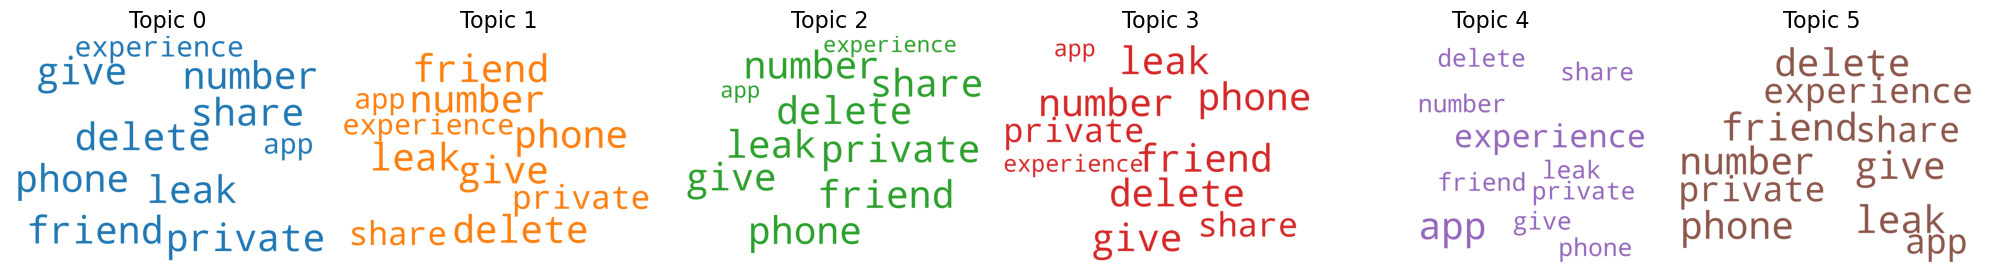

In [47]:
#Visualizing Word Cloud using Matplotlib
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(1, 6, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Summarizer

In [47]:
!pip install sumy

     ---------------------------------------- 0.0/97.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/97.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/97.3 kB ? eta -:--:--
     ----------- -------------------------- 30.7/97.3 kB 262.6 kB/s eta 0:00:01
     --------------- ---------------------- 41.0/97.3 kB 245.8 kB/s eta 0:00:01
     ------------------------------- ------ 81.9/97.3 kB 416.7 kB/s eta 0:00:01
     -------------------------------------- 97.3/97.3 kB 463.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for pycountry>=18.2.23 from https://files.pythonhosted.org/packages/48/12/fdbcd29b5a243af2f1c1a83636a21e3837aeaa070c9212ebe657e39ce563/pycountry-23.12.11-py3-none-any.whl.metadata
   ---------------------------------------- 

In [49]:
#Defining function
def word_len(text):
    return len(text.split())

In [50]:
df['word_count']=df['content'].apply(lambda x: word_len(x))#Calculating word count using Lambda function

In [52]:
df.head(2)

,index,Sr. No.,userName,content,score,thumbsUpCount,Cleansed,word_count
0,0,0,Mahendra Patil,Worst update ever. You're going to down your s...,1,430,worst update 're status implementation thing a...,65
1,1,1,Ganagaraj M,Very very worst experience.sharechat app not c...,2,7,worst experience.sharechat app compatible chat...,71


In [53]:
df1=df[df['word_count']>20]

In [54]:
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 


def text_summarization(text):
    # Input text - to summarize  
      
    # Tokenizing the text 
    stopWords = set(stopwords.words("english")) 
    words = word_tokenize(text) 
   
    # Creating a frequency table to keep the  
    # score of each word 
   
    freqTable = dict() 
    for word in words: 
        word = word.lower() 
        if word in stopWords: 
            continue
        if word in freqTable: 
            freqTable[word] += 1
        else: 
            freqTable[word] = 1
   
    # Creating a dictionary to keep the score 
    # of each sentence 
    sentences = sent_tokenize(text) 
    sentenceValue = dict() 
   
    for sentence in sentences: 
        for word, freq in freqTable.items(): 
            if word in sentence.lower(): 
                if sentence in sentenceValue: 
                    sentenceValue[sentence] += freq 
                else: 
                    sentenceValue[sentence] = freq 
   
   
   
    sumValues = 0
    for sentence in sentenceValue: 
        sumValues += sentenceValue[sentence] 
   
    # Average value of a sentence from the original text 
   
    average = int(sumValues / len(sentenceValue)) 
   
    # Storing sentences into our summary. 
    summary = '' 
    for sentence in sentences: 
        if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)): 
            summary += " " + sentence 
    print("Summarized Text::")
    print(summary) 
    
    return summary

In [55]:
df1['summary']=df1['content'].apply(lambda x: text_summarization(x))#Using lambda function to add a new column named "Summary"

Summarized Text::
 By mistaken profile name saved as (-) dash only and now couldn't change my name after multiple tries and reinstall app as well 2. While using shake n chat, Msgs delivery cannot visible till someone cannot save my chat.
Summarized Text::
 If you need do see the reply you must come away from tha chat box after that you see tha reply . The app need more and more improvement for chatting options.
Summarized Text::
 Good app for videos... Well done team... 👍 I have only one concern - When I installed the app, I mistakenly selected Malayalam as language thinking that the app is asking my video preference.
Summarized Text::

Summarized Text::

Summarized Text::
 Yes, My earlier problems are No more n I find it much much better as some new features are added.
Summarized Text::
 I don't want to rate one start to your app. No chat open, I can't send messages. If you can't solve it you may loose your popularity because of your worst servers.
Summarized Text::
 I tried using "He

Summarized Text::

Summarized Text::
 I have use this app for few months but I have purple badge but dont any earn money in this app please dont show off for the fake news in headlines.
Summarized Text::
 Hey, I like this app so much,so I rated 5 stars. Team sharechat, please try make the app for reel making like instagram and chatting with my relatives, that are included in instagram in the upcoming updates so people may like this app and download it.
Summarized Text::
 This is so discusting app i have 10 k in sharechat but i dont receive any cash and in this app so criticial bugs updates . So good app in app in his prime prime time .dont dowload this app
Summarized Text::
 Whenever open chat sound irritate us. Ad always present ... we could not continue this. 100 % worst .
Summarized Text::
 Song change karne ke baadh add aur song download karne keliye bhi add. Songs se zyada adds aatha hai.
Summarized Text::

Summarized Text::
 Now it is seen that that a link "Claim your Pre-Approve

Summarized Text::
 I have seen many times that the photos that I put on my profile or upload here get deleted from my gallery after a few days or become something that I never get back.
Summarized Text::

Summarized Text::

Summarized Text::
 But in this the creator should have get some earning like Facebook, YouTube, etc.
Summarized Text::

Summarized Text::

Summarized Text::
 Hii share chat I appreciate with the app but only one problem in this app the problem is (Audio system because I am useing this app and public is taking with me this is so irritated so can I stop this tell me and one more problem is this use so many data and so many storage and very Legi so you can fix it.
Summarized Text::
 Many ads recently viewed. New features very worst many ads.
Summarized Text::
 Very very worst app 1/ no fast logging & many error 2/ app refreshing is very slow 3/ performance wise very worst 4/ communication by this app is very worst 5/ many times of show adds in this app and many many er

Summarized Text::
 When I watch a video from certain tabs such as new, videos and images ,after coming back from the video it goes straight to the popular section .
Summarized Text::
 The most important issue is ... video uploading. At the time of uploading each video and uploading it with great difficulty... We need to find a solution to this as soon as possible ...
Summarized Text::

Summarized Text::
 I actually loved this app but it have some disadvantages ☹️.The problem just started from the time I installed it. For selecting language,there wasn't English, even though I am a Malayali I am not expert in malayalam.
Summarized Text::
 It includes good messages, vedeos, Status etc. I mean new and different messages and vedeos shall be regularly included in the App. Old messages shall be replaced at least twice in a week.
Summarized Text::
 All developers justify the display of ads in their aps but it should not be disgusting like this. The already have ads disguised as posts after eve

Summarized Text::
 It's giving limited access and can't login to watch anything.
Summarized Text::
 First of all, this app installed as spam.some bloatware software showed ad as notification, i wanted to go to app and change settings by clicking on notification but instead of opening the app ,this junk got uninstalled.
Summarized Text::
 This app is very nice and amazing... And nice vedios in shere chat i am impressed 🥰but their one problem.. Shere chat video logo was disturbing that's all.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 But I don't like the criteria of the app like atleast 10000 followers.
Summarized Text::

Summarized Text::
 Share chat is best application but now a days this aap based on ads only always showing ads and ads.
Summarized Text::
 Fully ads app, every 2 video 1 add, YouTube se bhi jyada ghatiya add h no skip.
Summarized Text::

Summarized Text::
 It overall features also seems like helo app, but on comparing with that some fea

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Lot of net will be loss for seeing one video also u hate this app..use less app time waste
Summarized Text::

Summarized Text::
 It's a good platform for me to show my thoughts and emotions to others... thank you so much share chat...
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Please solve PL ( my mobile model Tecno Spark 5 2 GB Ram internal storage 32 GB ) very very ads show 🤣🤣🤣🤣 very very hanging problem.
Summarized Text::
 Ku my rate 100 super app but notification very very notification I am tension but super app share chat First share chat next Instagram next YouTube Thank you share chat owner very very thankyou My family all members share chat than very very use panrangha and my mom .. my dad .. my Anna ..My Akka ... ..All family members of yo

Summarized Text::
 It directly saves the video in your gallery and you can use it any time on any platform or you can post in in your status.
Summarized Text::
 I am really upset about the fact that i had to change my language settings to தமிழ்.TWICE!!!
Summarized Text::

Summarized Text::

Summarized Text::
 Something is wrong or someone is using my account poor privacy & safety. 😠😡🤬This app is not valuable for even a single star but I have given a star because if I should give at least one star to post. But I you check & repair & fix the problem. But you should check & repair & fix the problems I mentioned.
Summarized Text::
 I don't like this apps. Always displayed this apps to install it I can't used fb by this apps ads. I hate it so much because when I install as it's continuously appear on my screen it doesn't have English language in it. I don't what this apps.
Summarized Text::
 But I have heard that this app is not working outside of India Soo plzzz fullfill this demands as so

Summarized Text::
 The old version of this sharechat is only good but when this app was updated I don't want to use or upload any video in this app becoz it's taking too much time to upload any video becoz of this my net also ends & I'm unable to upload video in other app also... Plz fix ur problem otherwise I will delete this app.
Summarized Text::
 😇😇😇😇Most most useful app but there is one problem in this app. In this app, online/active user is not shown for all user in chat. So I request you to update this to show online/active features in chats.
Summarized Text::
 This app is being more optional, and we can search different series like serials , movies , comedy , news , lifestyle, growth, emotional, sad , happy for updating more and more we need this app .
Summarized Text::
 Sometimes it doesn't appear the user name and sharechat logo on the uploaded video after sharing through whatsapp and scrolling is very slow Please fix these issue and make it smooth for better experience .
Sum

Summarized Text::

Summarized Text::

Summarized Text::
 The app is not good for making food videos for sure. Tried making food videos and it wil end abruptly if you stop for few minutes.
Summarized Text::

Summarized Text::
 Later, when I tried to open the profile, there is no open account.. Not only that, the app is also taking a long time to open.
Summarized Text::

Summarized Text::

Summarized Text::
 So just remove the vulger advertisements otherwise there is no option to user to remove the app from mobiles.
Summarized Text::

Summarized Text::
 I think if you can add the feature to add audio in video then it will be perfect.
Summarized Text::
 Notifications are either delayed or do not appear at all.Even the photo n video posts doesn't get uploaded even though, message flashes that the post is being uploaded.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Superb app.. Only lacking one feature. Please add video pl

Summarized Text::
 In all festivals, we submit many videos in our dp in WhatsApp.And also we send different different types of photos and videos to relatives, friends, brothers and sister.In this app we see many videos and photos in different varieties and if we want to like or comment on this then we can in this app.also if you want to post pictures and videos to this app then you can in this app.whatever you say,I think this app is very useful.I see always funny videos in this app
Summarized Text::
 When I contact to the members (in help option) they are not able to solve my problem and I am not satisfied with their answers.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 They don't have English language rather English language is mostly used between us, specially it's used in Social applications. They have lots of indian languages whose we don't use in chats or social platform🤷‍♀️. Please🙏 just create the option which only will for use 

Summarized Text::
 When I updated sharechat two days before it gives problem.. videos and photos download to phone gallery not possible..I try in many ways no use so I now uninstall the app.
Summarized Text::
 So i just gave them 5✨️.... awesome and its an cool app u must try it no problems while watching vedios or downloading 100%sure from mine words... all vedios are updated in it every day.
Summarized Text::

Summarized Text::
 I like this app because it is Indian app .But there are many defaults in this app . It do not respond after using 5 - 10 minutes and close automatically.
Summarized Text::

Summarized Text::
 I loved it, but since a week I'm unable to download videos using urdu as language. Plz help me share chat team and let me know how to download videos using urdu as languages.
Summarized Text::

Summarized Text::
 lam proud of being an Indian and also proud of it this App, because,this app made in India.All regards and also thanks.This app to help me to know daily or day 

Summarized Text::
 in this app very funny jokes birthday, aniversery and more wishes pics. therefore, i give only four stars.
Summarized Text::

Summarized Text::

Summarized Text::
 Very entertaining 😉 and as you define every category differently its so easy to come to our choice and the shake n chat system is very good and easy to talk with anyone and make friends thankx sharechat .
Summarized Text::
 This is very good app to use in this aap we seen all people posts and also chating with us and we already post any video, photo or text posts.
Summarized Text::
 It is very useful for daily news updates and any other things just like birthday's , deaths, and many other things...
Summarized Text::
 This application is very nice for all users.i have great experience from this application.here is all items available for morden people.and very easy to use it.here uploading and downloading is very easy.i like this and I love this application.so I say all people install this application and e

Summarized Text::
 Only half message getting selected while sending a big text message. From your website rest of part getting copied before.
Summarized Text::

Summarized Text::
 but when I want save save a photos or videos it doesn't download to gallery.
Summarized Text::
 But now I am unable to logging in, whenever put the otp it shows otp verification is wrong... What's wrong with that..
Summarized Text::
 Very bad, my account is not opening even after lots of effort. I have an official account and am trying to log in but it say "request is unsuccessful".
Summarized Text::

Summarized Text::
 Repeated videos, unable to search required topic, earlier it was good but .
Summarized Text::

Summarized Text::
 *Worst app* don't download it i strongly recommend all to do not downloadDo not download this app at all the share chat team (customer support)is worst they didn't answer you question even if its regarding cretical issue.
Summarized Text::

Summarized Text::
 I had created a accoun

Summarized Text::

Summarized Text::
 But the reason to give 3 stars beacause, when I will open it it start hanging.
Summarized Text::
 I love this app...and one thing that i have to say is that people should be able to login even without phone no.
Summarized Text::

Summarized Text::
 It's bugging also wanna say that one new prblm which is m unable to see the profiles in online when I go to chat rooms I can see only how many are online but when I click on it no profiles shown.... Plz plz humble req do something...
Summarized Text::
 I have deleted all my posts and account from ShareChat nearly 6 months ago. But still I can find my pictures of ShareChat posts in google search and Google Photos.
Summarized Text::
 ?I want my sharechat app back please tell something please give me a solution to solve this problem please please please please please please
Summarized Text::
 I don't understand that karma points..what's the use of getting them.. how can one be benefitted by karma points.. p

Summarized Text::
 Really superb app.😘😘😘😘😘this is the only app (except whatsapp) which will remain forever in my phone untill it's damaged...thank you sharechat team for this great app...
Summarized Text::
 Provide Dark theme feature, because this app is draining battery fast, and also irrelevant adds are annoying.
Summarized Text::
 We do vedios you want apply Malayalam dialogue and songs I think you guys will improve it if you are improving I will definitely change the description and I will put 5 stars for you guys I want this app also get to be a tiktok app
Summarized Text::

Summarized Text::
 But the drawback is that we cant get our own searchig results .
Summarized Text::
 I had use this app past 6 month if I were in a chatroom I can't play a song or music...
Summarized Text::

Summarized Text::
 Very limited share options with only whatsapp.
Summarized Text::
 I'm trying to upload a video it shows that video is getting compressed.
Summarized Text::
 Nice app but ......The share

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Despite of mentioning it many times in feedback, the problem still persists.
Summarized Text::
 There is a chance to become an option, but there is no option to upload videos, to post on the website on the computer!
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Sharechat but your team is not responding me in making my account verification. All though I'm famous i had sended my details to your mail. And instead of launching new application first make your team cooperative on your this application.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 All the video are not Download in my mobile please change the Downloading problem.
Summarized Text::
 The best thing about the app is that u can chat with your friends ....in last I like that app very much.
Summarized Text::

Summarized Text::
 Doesn't allow to change language easily nor does it 

Summarized Text::
 We are facing virus isssues on sharechat app music playing on background and to much ads running on home screen from ur application .
Summarized Text::
 Soo many members call me from unknown numbers and telling that u "gave me ur number on sharechart app" Seriously I don't use this app it is not their on my phone with out using this app how can I chat to someone?
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 It was very good app but nowadays I am really disappointed 😩😩😳😳 It not work properly .
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 One thing l noticed that total numbers( shares & likes) which l get in Notifications differs from my actual post. On post l get less figure than notifications.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summari

Summarized Text::

Summarized Text::
 It is almost one and half year completed using the app but till now there is no great experience in it .
Summarized Text::

Summarized Text::
 I have got 25 top creator 11 admin 3 police but it have shown 2 admin 2 police!!
Summarized Text::
 This is very excellent app and it's better than all china apps like tik tok helo and like.
Summarized Text::
 It's so good app to use nd find awesome friends Some normal isshu.
Summarized Text::
 I am giving this app only two satrs because it's update comes frequently in the one month about three to four times.
Summarized Text::

Summarized Text::
 I am trying many times to install the app from Google Play Store after installing it's not woryand saying that something went wrong.
Summarized Text::

Summarized Text::
 Good app, every Indian should use this app. If sharechat company update this app , then all indian will use this app like Chainese helo app.
Summarized Text::

Summarized Text::
 But from some days

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 I have been using this app since 4 years.. it was deleted due to storage problem, and now it doesn't download.
Summarized Text::
 Very very worst.Whatsapp video sharing is very slow. Sometimes in the worst case I could not share anything.
Summarized Text::
 But problem is that there is no other languages than indian languages,please add english also if foreigners use this app so they don't face any problem .
Summarized Text::
 Because if are not uploading posts daily No followers are increasing They have to improve many more features . We can't sent photos to friends Have to improve...... 😔
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 I Unstalles and Installed this app many time so now I'm giving 2 star because it's not working properly.
Summarized Text::
 I think every 30 sec .i quit this app when was add came .im disappointment ..
Summarized Text::
 I can't do

Summarized Text::
 I guess it is not in English language ..... although it is made in India but you hv to take care of user's comfort.
Summarized Text::

Summarized Text::
 I love sherechat only.. because I have many follows . And good friends.. it's a beautiful app for downloading video songs. And chatting for someone.. love you sherechat.
Summarized Text::
 It is very nice app, but there is no option to turn Hindi language into English.l know that it is an Indian app, so you are not gave option of English language but helo is a Chinese application and in helo app, there is option of Hindi language then why you are not giving option of English language?
Summarized Text::

Summarized Text::
 This app is wonderful but make some improvements like facebook add groups and also add Sharechat page,sharechat channel like youtube and you also a millionear.but I know it as very hard to update like that but you take time than you update app.
Summarized Text::
 Whenever I try to sign in, it doesn

Summarized Text::
 I have face some problems, for that reason I mailed more than 10 times but till now no reply.
Summarized Text::
 U can share any kind of wallpaper like full of life , MOTIVATIONAL , SHAYARI GUD MRNING+NIGHT WISHES & POLITICAL TRANDING ETC... i have ever seen in my life.
Summarized Text::
 I love this app is a bit of a new one, but I think I have a look at the moment, but I think I have a look forward to seeing you all the best way to get the best way forward for the next few weeks ago and I will be in the UK for a few days later date. *()()()()() :;,?+×÷=%_€££¥₩!@#$/&^*()☆▪-'":,,:;?
Summarized Text::

Summarized Text::

Summarized Text::
 Although it's going to be bad because in chatting I heard and had seen a lot of worst messages
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 I was so happy to install this app because it tell us what's the specials in a particular day and it gives videos and photos 

Summarized Text::
 It has different categories and provide lot of useful information like education,health,entertainment etc.. i like this app..
Summarized Text::
 I refered app but still didn't receive any reward. Customer care agents are dumb and unprofessional.they can't understand English as well.
Summarized Text::
 Problem is I sent sms any one sms send so late. New issue comes not to use Shake and chat.
Summarized Text::
 I'm not getting the option of English language which is the head stuff. Plzz update the English language too.
Summarized Text::

Summarized Text::

Summarized Text::
 Hey team add english language option in theme & also work on AI auto make-up program.
Summarized Text::
 Dear team , I can't use it to search some people , so please do make some improvements .
Summarized Text::
 In this app many features to use many people.
Summarized Text::
 Refer and earn, videos of fun, motivational, romance a huge stock.
Summarized Text::

Summarized Text::
 Great app for maki

Summarized Text::
 No one wanna use this application but showing ads multiple time they make people their prey.
Summarized Text::

Summarized Text::

Summarized Text::
 its very perfect and nice but a little bit disturb suddenly app is stopped otherwise all ok.
Summarized Text::

Summarized Text::

Summarized Text::
 For quite a few days this app isn't working, pics n videos r not opening up in Jammu region but developers aren't doing any thing to put it right.
Summarized Text::

Summarized Text::
 Here we can entertaine with more videos, songs, Pics, quotations, etc.
Summarized Text::
 All videos are here even moj or snack or insta etc .
Summarized Text::
 And lot of sex and unwanted videos are seen this is not good. Don't allow sex videos uploading.
Summarized Text::
 If they do this bad behaviour then there must be a option for an user to atleast delete or remove his account and personal details. But they captured my account and I am unable to use the app and even I can not able to 

Summarized Text::
 Hi share chat team, More then time I was facing the sharing and downloading issue in your App so kindly fix this bug.
Summarized Text::

Summarized Text::

Summarized Text::
 Its cosumd lots of phone space more than 900MB.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 It's only show"फिर से लोड करें" on home screen of share chat.. for more than 1 month. Please help me.. it's running only over the wifi...
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Bcoz we can collect Every day news from this App and also fantastic film videos and Audios and also good Morning and Good Night super images etc.
Summarized Text::

Summarized Text::
 But can improve in terms of When we are sharing a pic Or vid, so much text is needed to be cutted before sharing something to someone
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Nice app it is too good we can share any kind of messages and when any festival comes it becomes special.
Summarized Text::
 Share chat is not working in my Samsung(GT-I8262) andriod 4.1.2 version. (My phone is damaged so im using this Samsung(GT-I8262) andriod 4.1.2 device)
Summarized Text::

Summarized Text::

Summarized Text::
 If I start talking about the excellence of its features and qualities the day will be short to tell.
Summarized Text::
 I am facing lots of problems when I sending messages or looking some old messages.
Summarized Text::
 That can make any user very 😡.in just 2 min ,I got 4-5 adds..😤😠
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Every functions are so attractive and nice...but videos are very slow....plz solve this problem....thanx
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 I'm turned

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 It's good and also have fun where you can enjoy ,enterntain your self and people by your thoughts , views, shows yours perspective to people.
Summarized Text::
 It's is good going like I was using hello aap .But due to all what happened I shift my interest to share chat . Like I m a new user so it take time to understand all it's features and criterias .
Summarized Text::
 But English language is not. I know English language. There is no language other than that and there is no English language in this app can you add in English language...
Summarized Text::

Summarized Text::

Summarized Text::
 I can find lot of fun and knowledge from this app, I love spending my time posting, liking, commenting.
Summarized Text::
 i like it , it is entertaiment app like music , video ,
Summarized Text::

Summarized Text::

Summarized Text::
 we don't know who's use our account from another device.
Summariz

Summarized Text::

Summarized Text::

Summarized Text::
 Share chat is a very cute app.
Summarized Text::

Summarized Text::

Summarized Text::
 It's a nice app though..Developers, kindly develop it in English as well..
Summarized Text::

Summarized Text::
 Hey, this is the application for entertainment , study and general knowledge.
Summarized Text::
 This is nice app but there is no filters ,effects in video making and this uses lots of mobile data....otherwise this is very nice app Proud to be using our indian app.
Summarized Text::
 I don't know why we cannot take screenshot instead of downloading the pictures. New version does not download the videos and could recognise the status of download...
Summarized Text::
 😘😘😘it's very good app daily news, jokes, whatsapp status, sad status, share chat talkies, and many more.
Summarized Text::
 We can not download any video in this sharechat i have uninstall it and installed then to no use... and we are not getting good quality so please b

Summarized Text::

Summarized Text::
 latancy in showing video and photo it shows blank first then it downloads then you can see the post.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 something is wrong in this application in my profile I follow someone but it's not show that please update new version
Summarized Text::

Summarized Text::

Summarized Text::
 First time i have start this app but it has many problem i have delete this app second time its not download
Summarized Text::

Summarized Text::
 It's automatically logged out before and now i couldn't login not getting OTP to my number
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 it is using hell lot of power from the battery. battery is draining fast when using this app.
Summarized Text::
 Please upgrade this feature in app I am very sad because I can't find my friend who is available on on anty channel and who i

Summarized Text::
 when i post videos i give my own tag but sharechat remove my tag 😡😡 this is not good.💔💔
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Sharechat app could have beaten Helo App if it reduces advt.
Summarized Text::

Summarized Text::

Summarized Text::
 We get so many pubg videos and other videos so i like my nme is Ancy I'm frm earth ok thanku playstore for giving we this app😊
Summarized Text::
 Good app but it is coming sharechat voice in last that is irritating and don't keep sharechat at last ok.
Summarized Text::

Summarized Text::
 Gud one very useful and nice songs I liked it lot.
Summarized Text::

Summarized Text::
 But i want english language to be included even though if we are not logged in.
Summarized Text::

Summarized Text::
 I cant even understand, why the makers of this app has done like this so far .
Summarized Text::
 But the one thing more we wants that is "search freind nearby", plz improve this.
Sum

Summarized Text::
 it doesn't working properly..I can't here voice in group chat..and I can't open profiles some time ..app is more strucking... please repair it
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 It's very bad aap because large ads it's very boring app because of only adds...
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 This app is very nice lots of information is on true basis always get different knowledge n information.
Summarized Text::

Summarized Text::
 In this new version I can't save images.. The older version was really better.. Do we something about it.
Summarized Text::

Summarized Text::

Summarized Text::
 Better to introduce option like choose gender to chat, then easy to avoid unwanted ones.
Summarized Text::

Summarized Text::
 This app made my day happy , satisfied , etc.
Summarized Text::
 it's good app and i use it to keep in contact with

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Why should not update the karma ,post will be send but not increase the karma and group dp should not able to change options why?
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 I install this app but it did not full appload.. it again starts from 0% 🤷🏻‍♂️I did not understand what's problem in your app?
Summarized Text::
 Good app for status and it is useful to make frnds and talk with them in chat room and in this we can see moj app also.
Summarized Text::

Summarized Text::

Summarized Text::
 It is a amazing platform to, be connected with a people arround us in useful manner by keeping our valuable time management in mind.
Summarized Text::

Summarized Text::
 World Best app but two problems first no earning money and second like, share and views are always fake.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 it is very nice app...se

Summarized Text::
 Recently this app is crashing so much i don't know what the issue is happening to it.
Summarized Text::
 Why unable to open friend List who are accepted both accepted but unable to open the issue from last 10 days....what you are doing???
Summarized Text::

Summarized Text::
 It's so helpful in my PSC and general Knowledge Preparation too....
Summarized Text::

Summarized Text::

Summarized Text::
 No English language?!
Summarized Text::
 I tried shake and chat and I can't see opposite person message untill I save that chat.
Summarized Text::
 It's a nice app to share our happyness .
Summarized Text::

Summarized Text::
 But please update it for English language also. There is no option for opting English language. I hope, that sharechat team will upgrade it.
Summarized Text::

Summarized Text::
 it asks ph number and i enter it correctly.
Summarized Text::
 we can chat many people by using sharechat. 😇😇Sharechat helps me in senting vedios to my friends.
Summarized T

Summarized Text::

Summarized Text::
 if we type correct id it is showing some other account which is not correct.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Home page is not work properly because i followed only 4 people but it shows 8 people and my followers are 5 but it show 4 people.......
Summarized Text::
 i can not to using this app in chat room (Kannada) admins and users talking bad words and hacking user IDs and it's truly become frod
Summarized Text::

Summarized Text::

Summarized Text::
 I have many friends in that app i had downloaded soo many videos and i upudated those in my status.........every day i used share chat sooo....,thats rhe reason i love the share chat
Summarized Text::

Summarized Text::

Summarized Text::
 Nice to use and easy to search other friends .
Summarized Text::
 After The New Updates My Old Post Is Not Showing In My Gallery.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Contains joke, v

Summarized Text::

Summarized Text::

Summarized Text::
 It has many jokes , new songs , morals etc.
Summarized Text::

Summarized Text::

Summarized Text::
 I cant use this app in my phone.... while open the app it shows that no internet connection....for 2years am a user...
Summarized Text::
 Very worst app because it consumes lot of data.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Awesome application for making funny video and sharing with friends.
Summarized Text::

Summarized Text::

Summarized Text::
 In Google play store is showing " Beta program for this app is currently full".
Summarized Text::

Summarized Text::
 I love this app although it lets me tag only one hashtag while I can see some people using multiple hashtags (dunno how, maybe they possess some cheat codes).
Summarized Text::
 And when the boys play that game, they used to get the number of girls. So many boys used to call me 

Summarized Text::

Summarized Text::
 It cant shows, which we want... Shows else we cant needed..
Summarized Text::

Summarized Text::
 And it is fun to have and it is very easy to share the videos to the WhatsApp...........
Summarized Text::
 I love this app I am impressed with share chat but two problem notification and screen shot settings is very bad but share chat user very good.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 I can't send any picture to my friend or following.. can u please solve this
Summarized Text::
 So much comedy , games , fun and so on.. this app also allow us to share photos and videos
Summarized Text::

Summarized Text::
 Without reason I'd will BAN then so many updates.. Without reason my ID was banned.. Useless waste of time. If Id banned.. Should have some reason..
Summarized Text::
 But one thing ur logo add in the video very disturbing the viewers.....
Summarized Text::

Summarized Text::
 Wrost app bloody app why put in P

Summarized Text::

Summarized Text::

Summarized Text::
 This is an Indian social app that every Indian should use in their mobile.
Summarized Text::
 App is good and this app is useful to me nd no ads tq , and a share chat team still make this app good , tq😃😃.
Summarized Text::

Summarized Text::
 One of the best social media to the public of the world. Of course at present it is in India USA and Europe counties.
Summarized Text::
 I gave only three stars because share chat is taking more data and we can't use our data for other apps.
Summarized Text::

Summarized Text::
 Very bad for you your service everytime advertisement is coming and am not see any videos and chats please clear the advertisement problem.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 App was super but the user share the video posted by me not receive thenotification thats a problemm.
Summarized Text::

Summarized Text::
 Sharechat is nice but when

Summarized Text::

Summarized Text::
 I am ‘Popular Sports Creator’ in ShareChat🏏Very good app and very fun to use.
Summarized Text::

Summarized Text::
 it is real a Indian app .His video and voice quality is very good
Summarized Text::
 Connecting millions of the ❤️ s in this app Amazing amazing amazing it's amazing I love share chat
Summarized Text::

Summarized Text::

Summarized Text::
 This app is very useful and learn to all types of knowledge.
Summarized Text::

Summarized Text::
 When a comment is placed in the comment box, the new comments go to the very bottom. If new comments came up at the top, it was easy to post each comment.
Summarized Text::

Summarized Text::
 It's a nice app & we can read jokes & about education , carrier & etc
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Dont purchase coin, 1st you see offer 5coin/min with minimum balance of 125 coins but after your 1st call offer change to 10coin /min.
Summarized Te

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Hi share chat give update for auto swip up next video or play full video then automatically play next video.
Summarized Text::
 Tamil Tech central add is more irritated I was blocked but is irritating me every 2 video.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Find people near you 2. Videos sharing in inbox 3. Auto update/refresh inbox 4.
Summarized Text::

Summarized Text::
 i had never seen this type of apps. all category in one apps is such a wonderful for me.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Otherwise it's a good app.😊
Summarized Text::

Summarized Text::

Summarized Text::
 Details of stupid compliance officer and police deptt are missing from sharechat policy.
Summarized Text::

Summarized Text::
 I love this app and 

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 But many times its stop working... I want to request to sharechat team... To do something for that...
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 I think it is the best app to use and share and chat any thing any where in indian languages
Summarized Text::

Summarized Text::

Summarized Text::
 Namasthe sir/Mam ..In sharechat All are Nice.. But day after before day I updated sharechat.. While updated, New group link s are not opening why?
Summarized Text::
 I love This App .Because There are so many languages in This App and Downloading aslo so easy .
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Informative, entertainment filled chats Variety chats Sports, devoti

Summarized Text::

Summarized Text::

Summarized Text::
 share chat is better than others app , i saw many apps not like a share chat , iam suggestions you also download this app and enjoy the videos
Summarized Text::

Summarized Text::

Summarized Text::
 Am a Malaysian TAMILIAN, But I attend local government Malaysian school. Can you please change it to English subtitle please. Please use English language too.
Summarized Text::

Summarized Text::

Summarized Text::
 Bro plz fix 🔧her network📡 prblm because that in some chat that photo and post is not sending he show return try ?
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 This is useful and my feelings videos available this app totally i love it please install.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 This app is good b

Summarized Text::

Summarized Text::
 India's most wrost app, sharechat was unnecessary block my account one year.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Pls update the app for sharing wtsapp group links to join customers.. We are sharing links bt no use.
Summarized Text::

Summarized Text::
 i like this app very much .nowadays my pass time is seeing moj in sharechat app
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 I thankful for Share Chat for my purple batch ..I wish I get golden batch for few days..🙂👍thxx again .
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Why this very slow nd i can't create my account on this.. Am really angry with this app..
Summarized Text::
 I want download videos in my phn gallery but in this app the videos directly goes the sharechat gallery..what is this?
Summarized 

Summarized Text::
 I tried a lots of but chatroom voice is not coming i don't know why. But in other phone chatroom voice is coming.
Summarized Text::
 It does not download properly it make too much tension why i update recent update also but still does not download ?
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Not possible to open if mobile change old to new one purchase.
Summarized Text::

Summarized Text::
 But it didnt have Facility to login with Email....or it didnt have facility to login with phone number with password without the otp we didnt login so u include that facility it completely good..... Dont Compare with Helo App it was A Veeeryyy Good App Share Chat ente airtel number vach Login cheytha..numberil msg varunnilla otp sent avunnilla accountil keeran pattunnila enda chheyya rply me share chat..
Summarized Text::
 This app is very good.,.for me .. because iam uploading mare video's and photos....and I 

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Concèpt aacha hai... but some of the bugs are there; need to resolve..
Summarized Text::
 My chat is not working if I click on message it's show unfortunately stopped?
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 We Shere Everythig Without Hasitate.It's Spacialige Not Share Chsts But Also Expressing Views , Opinions And Also Sher Gk, Knolefge And Exprience.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 But sometimes this app didn't help me for download videos and photos.why?
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 There are too many Christian songs and Christian verses in your share chat.
Summarized Text::

Summarized Text::

Sum

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Please do 2 thing 1.photo post in bulk 2.set back ground as many as possible You have facebook as your opponent.
Summarized Text::

Summarized Text::

Summarized Text::
 Supposed the first one of our refurbished to a few days, so I will not be a problem.
Summarized Text::

Summarized Text::
 Superb app...👍👌 Proud to use Indian app... All the things are great in this app..
Summarized Text::

Summarized Text::

Summarized Text::
 Why You guys doing like that, for every 2 video your provide ads.
Summarized Text::

Summarized Text::

Summarized Text::
 Its soo nice ......only while uploding some vedios on status... share chat symbols vome's.
Summarized Text::

Summarized Text::
 I refer my friend yesterday who is new in share ch

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Worst app ever as someone created my fake ID and also used my phone number in it WORST APP EVER !
Summarized Text::

Summarized Text::
 How to serch our friends by name,district,state, is there any option to serch like this?
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Very bad app Its taking 1.5 Gb Internet within a 10 minutes..... How..
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 It is very good app so I'll Say to everyone and every Indian Please download this app and use it .
Summarized Text::

Summarized Text::
 Come up with more such Indian apps so that people forget to use Chinese apps
Summarized Text::
 i am loved this

Summarized Text::

Summarized Text::
 Oc AA Vfh TT nnc mm m mm ks tmdfrfr3 Ed btb M Nn Yhb AA. Pl mpc mm ii dttbtt fu Ff vv ki K knn yu.yv.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Hi share chat I'm using this app last 3 years and I enjoying a lot....but only one thing.... some guys are chatting with me with an unparliamentary ....languages in the shaken chat.....please do something share chat.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 I love share chat because this app gave all informations and I must need time pass gave fun.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Bt when we talk to strangers in shaking msg is not going.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 ........because when I try to upload a post it does'nt upload and that's why i don't like this app but first i like this app
Summarized Text::
 One of my friend is claiming that...he is not able to see my messages.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 My suggestion is give a chance to grp members to delete join grps from joined groups if they are not intrested...
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Plzz take action on this...... Then it is very good app I ever seen Your user Alina khan
Summarized Text::

Summarized Text::
 The app all world famous app.... The Indian app so very shining app......
Summarized Text::

Summarized Text::
 This is good platform for sharing good information through posts and pictures, yet the offensive posts about religion,faiths God and Godesss should not be allowed.I just saw an offensive post about Lord shiva from some one 

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Morning update to baadd ...chatrom ch add nhi hoya ja rhaaa ...plz fix this issue ownwer ...otherwise this app is awesome ..
Summarized Text::

Summarized Text::

Summarized Text::
 In group chat, people only talk dirty, we also report, but you don't close any group, you make a profit, little kids are getting worse because of this app.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 BB ki vines vines compilation of all the best for women stylish latest flash player is obligated rahegi na tumse Bassi hi I was not able to do it in my business partner with you bestfriend you can do it r4 hi h happy birthday to you are not able to understand the best for women stylish flash player upgrade required to do the best for the best for women stylish latest flash player is required for women stylish la

Summarized Text::
 I am changing my review because the videos i uploaded in the support of Indian farmers , they deleted all media and said u tagged wrong , okay if i tagged wrong okay but why only those videos removed which i posted in the urge of farmers .
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 if u give 1 rate your share chat not work.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Dear sharechat,, I really likes this app. But now, In my phone, the like button is not visible.what can i do?
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 HELP..🙄I just installed this app ..I wanted to have the English language but there is no option for English.. now I am seeing the th

Summarized Text::

Summarized Text::
 I get more good frndz through this app.... Am glad to having this app
Summarized Text::

Summarized Text::
 This app is money earned in best because this app gived to card 💳 on open 4 days backs this problem is no understand.
Summarized Text::

Summarized Text::

Summarized Text::
 I love this aap 😘 Because it has all kinds of status that everyone wants in an app, everyone does not know, but I like this aap very much.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 This app is very easy and systematic in use .
Summarized Text::

Summarized Text::
 This is good App.. Entertainment app.. Good newses In this App..this App have Good Status For WhatsApp..
Summarized Text::
 This app is good for me and should be every one This app is not only for fun but also enhance knowledge .
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 N k या दोन प्रकारच्या असतात तर कधी न कधी तर ते जास्त आह

Summarized Text::

Summarized Text::
 Is was ver good app . Is also help ful for whatsapp status is .
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 The picture comment is not good....... anyone can misuse the photos.....so plz.... avoid the advance comment section...... Plz lesson to my review..... Then I'm using the sharechat 2 yrs ago.....but this version not satisfy.
Summarized Text::

Summarized Text::
 Dear admin kindly create an option to kickout from chat room.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 online report is india's popular hindi news channel.online report channel cover latest news in bol

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Is this real one What are the benefits you are provide coz I'm a video creator And I'm getting lots of share and views but when I post my YouTube channel link not getting any views at all???????
Summarized Text::

Summarized Text::
 I have not used this app but now I need to use so I have one question is this app consume more data ?
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 Very excellent app I like this app very much its really entertaining app My id- Keshav Bhardwaj (bhakti creator) follow me on Sharechat for bhakti related post.
Summarized Text::
 Actually very best Aap.Myself was a regular user of HELO aap.
Summarized Text::
 I really like this app.I use chatrooms.I was banned from the chatroom.Kindly do something becauz it was none of my mistake.
Summarized Text::
 Become a Viral Star 🤩 Refer Friends and Earn Cash 💵 Tik Tok Type Videos 👻 Download and Share FREE WhatsApp St

Summarized Text::

Summarized Text::
 I am very much proud of this indianbased app, I m also parr of your esteemed organization.
Summarized Text::

Summarized Text::

Summarized Text::
 Pls help me how can i unblock a person in sharechat which is accidently reported and blocked by me.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 I use this app in leisure .As your 😄 mood you can enjoy you life when u open .
Summarized Text::

Summarized Text::
 My all fav pics and vedio are here.thnku team snapchat😊
Summarized Text::
 Massage is not recived ahe chat is misssing Than i have chat person massage nothing go only tap to reply My all chat clear and massage not deliver
Summarized Text::
 In Shake in chat do not see girl 😥.
Summarized Text::

Summarized Text::
 Eukmbggffvjklvfguys i am going out for a while ago and it is not an option to go on a friday afternoon and evening of the best thing to be a bit more time in my inbox is not the best thin

In [56]:
df1.head(2)

,index,Sr. No.,userName,content,score,thumbsUpCount,Cleansed,word_count,summary
0,0,0,Mahendra Patil,Worst update ever. You're going to down your s...,1,430,worst update 're status implementation thing a...,65,By mistaken profile name saved as (-) dash on...
1,1,1,Ganagaraj M,Very very worst experience.sharechat app not c...,2,7,worst experience.sharechat app compatible chat...,71,If you need do see the reply you must come aw...
